# Importing Libraries

In [84]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.figure_factory as ff
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
import pickle

# Importing Dataset

In [85]:
dataset = pd.read_csv("Dataset/indian rainfall.csv")

# EDA

In [86]:
dataset.head()

SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec FLOOD  
0   1696.3    980.3   YES  
1   2185.9    716.7   YES  
2   1874.0    690.6   YES  
3   1977.6    571.0   YES  
4   1624.9    630.8    NO

In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4090 entries, 0 to 4089
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4090 non-null   object 
 1   YEAR         4090 non-null   int64  
 2   JAN          4090 non-null   float64
 3   FEB          4090 non-null   float64
 4   MAR          4090 non-null   float64
 5   APR          4090 non-null   float64
 6   MAY          4090 non-null   float64
 7   JUN          4090 non-null   float64
 8   JUL          4090 non-null   float64
 9   AUG          4090 non-null   float64
 10  SEP          4090 non-null   float64
 11  OCT          4090 non-null   float64
 12  NOV          4090 non-null   float64
 13  DEC          4090 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4090 non-null   float64
 16  Mar-May      4090 non-null   float64
 17  Jun-Sep      4090 non-null   float64
 18  Oct-Dec      4090 non-null   float64
 19  FLOOD 

In [88]:
dataset.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
FLOOD          0
dtype: int64

In [89]:
dataset.describe()

YEAR          JAN          FEB          MAR          APR  \
count  4090.000000  4090.000000  4090.000000  4090.000000  4090.000000   
mean   1958.321271    18.818484    21.644792    27.252494    42.714548   
std      33.148944    33.521719    35.762010    46.829179    67.264863   
min    1901.000000     0.000000     0.000000     0.000000     0.000000   
25%    1930.000000     0.600000     0.600000     1.000000     3.000000   
50%    1959.000000     5.900000     6.600000     7.800000    15.500000   
75%    1987.000000    21.950000    26.600000    31.100000    49.375000   
max    2015.000000   583.700000   403.500000   605.600000   595.100000   

               MAY          JUN          JUL          AUG          SEP  \
count  4090.000000  4090.000000  4090.000000  4090.000000  4090.000000   
mean     84.868044   228.928020   346.496968   289.897506   197.003056   
std     122.556801   233.535693   269.352685   187.702293   135.266708   
min       0.000000     0.400000     0.000000     0.000000     0.100000   
25%       8.500000    70.000000   175.225000   155.925000   100.400000   
50%      36.050000   138.450000   284.300000   259.500000   173.600000   
75%      94.975000   302.250000   416.700000   377.775000   265.600000   
max    1168.600000  1609.900000  2362.800000  1664.600000  1222.000000   

               OCT          NOV          DEC       ANNUAL      Jan-Feb  \
count  4090.000000  4090.000000  4090.000000  4090.000000  4090.000000   
mean     95.139022    39.548191    18.695575  1411.008900    40.462861   
std      99.325638    68.275513    42.185553   903.846565    59.136229   
min       0.000000     0.000000     0.000000    62.300000     0.000000   
25%      14.600000     0.700000     0.100000   804.500000     4.100000   
50%      64.650000     9.500000     3.000000  1121.300000    19.000000   
75%     148.100000    45.475000    17.300000  1644.775000    50.200000   
max     948.300000   648.900000   617.500000  6331.100000   699.500000   

           Mar-May      Jun-Sep      Oct-Dec  
count  4090.000000  4090.000000  4090.000000  
mean    154.835452  1062.325575   153.384499  
std     200.315769   705.970202   166.414108  
min       0.000000    57.400000     0.000000  
25%      23.800000   573.275000    34.025000  
50%      74.250000   880.200000    97.550000  
75%     195.300000  1286.175000   211.800000  
max    1745.800000  4536.900000  1252.500000

In [90]:
dataset['SUBDIVISION'].unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [91]:
dataset['SUBDIVISION']

0       ANDAMAN & NICOBAR ISLANDS
1       ANDAMAN & NICOBAR ISLANDS
2       ANDAMAN & NICOBAR ISLANDS
3       ANDAMAN & NICOBAR ISLANDS
4       ANDAMAN & NICOBAR ISLANDS
                  ...            
4085                  LAKSHADWEEP
4086                  LAKSHADWEEP
4087                  LAKSHADWEEP
4088                  LAKSHADWEEP
4089                  LAKSHADWEEP
Name: SUBDIVISION, Length: 4090, dtype: object

# Data visualization

<AxesSubplot:xlabel='FLOOD', ylabel='count'>

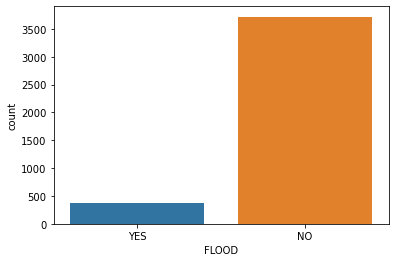

In [92]:
sns.countplot(data=dataset, x='FLOOD')

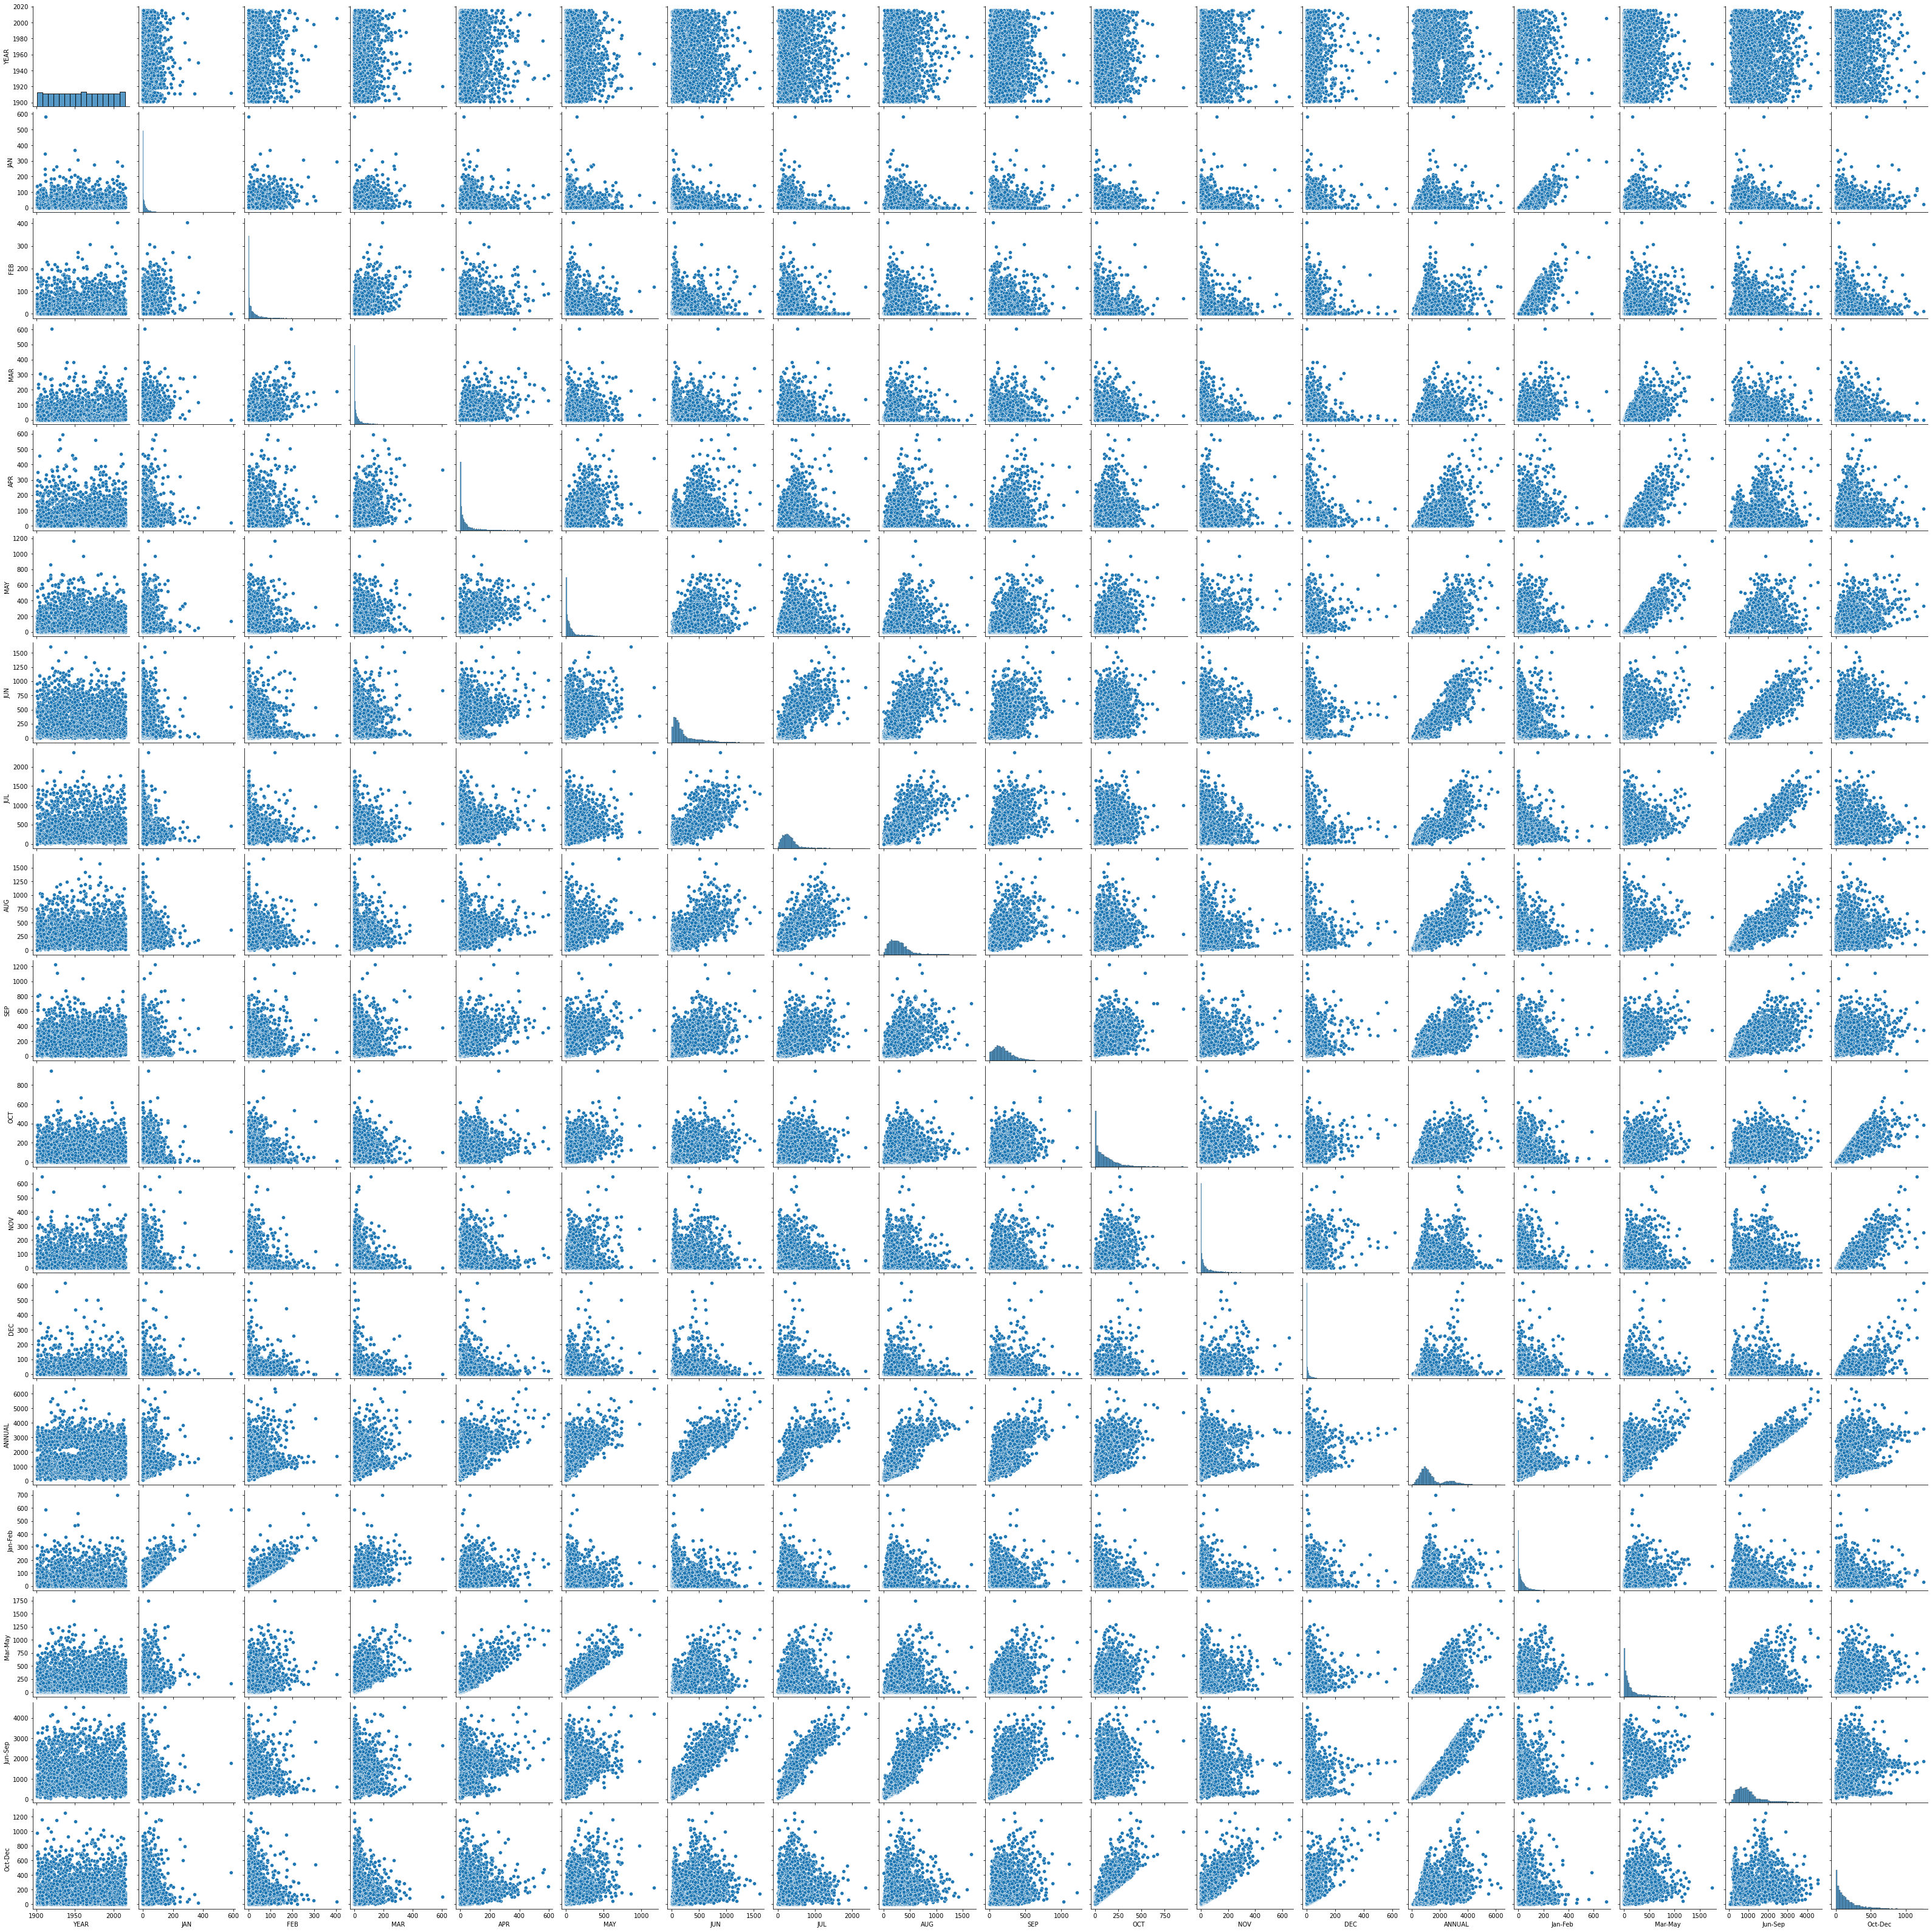

In [93]:
sns.pairplot(dataset)

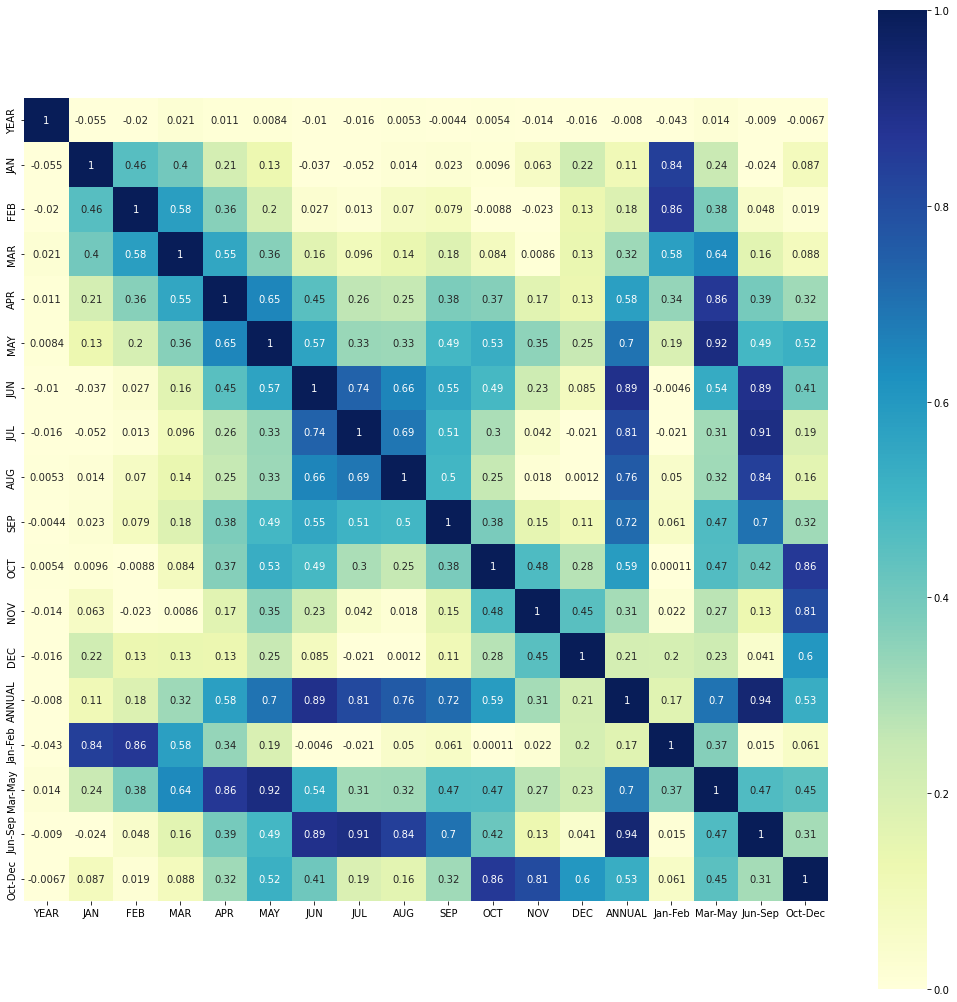

In [94]:
corrmat = dataset.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,annot=True, square=True, vmin=0, vmax=1,cmap="YlGnBu");

In [95]:
hist_data =[dataset["YEAR"].values]
group_labels = ['YEAR'] 
ax=ff.create_distplot(hist_data, group_labels)

ax.show()

In [96]:
histogram=px.histogram(data_frame=dataset,x="ANNUAL",nbins=100)


histogram.show()

In [97]:
histogram=px.histogram(data_frame=dataset,x="Jan-Feb",nbins=100)


histogram.show()

# Feature Selection Using Correleation 

In [98]:
label_encoder = preprocessing.LabelEncoder()

In [99]:
dataset['FLOOD']= label_encoder.fit_transform(dataset['FLOOD'])

In [100]:
dataset['SUBDIVISION']= label_encoder.fit_transform(dataset['SUBDIVISION'])

In [101]:
dataset

SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN    JUL    AUG  \
0               0  1901  49.2   87.1  29.2    2.3  528.8  517.5  365.1  481.1   
1               0  1902   0.0  159.8  12.2    0.0  446.1  537.1  228.9  753.7   
2               0  1903  12.7  144.0   0.0    1.0  235.1  479.9  728.4  326.7   
3               0  1904   9.4   14.7   0.0  202.4  304.5  495.1  502.0  160.1   
4               0  1905   1.3    0.0   3.3   26.9  279.5  628.7  368.7  330.5   
...           ...   ...   ...    ...   ...    ...    ...    ...    ...    ...   
4085           18  2011   5.1    2.8   3.1   85.9  107.2  153.6  350.2  254.0   
4086           18  2012  19.2    0.1   1.6   76.8   21.2  327.0  231.5  381.2   
4087           18  2013  26.2   34.4  37.5    5.3   88.3  426.2  296.4  154.4   
4088           18  2014  53.2   16.1   4.4   14.9   57.4  244.1  116.1  466.1   
4089           18  2015   2.2    0.5   3.7   87.1  133.1  296.6  257.5  146.4   

        SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  \
0     332.6  388.5  558.2   33.6  3373.2    136.3    560.3   1696.3    980.3   
1     666.2  197.2  359.0  160.5  3520.7    159.8    458.3   2185.9    716.7   
2     339.0  181.2  284.4  225.0  2957.4    156.7    236.1   1874.0    690.6   
3     820.4  222.2  308.7   40.1  3079.6     24.1    506.9   1977.6    571.0   
4     297.0  260.7   25.4  344.7  2566.7      1.3    309.7   1624.9    630.8   
...     ...    ...    ...    ...     ...      ...      ...      ...      ...   
4085  255.2  117.4  184.3   14.9  1533.7      7.9    196.2   1013.0    316.6   
4086  179.8  145.9   12.4    8.8  1405.5     19.3     99.6   1119.5    167.1   
4087  180.0   72.8   78.1   26.7  1426.3     60.6    131.1   1057.0    177.6   
4088  132.2  169.2   59.0   62.3  1395.0     69.3     76.7    958.5    290.5   
4089  160.4  165.4  231.0  159.0  1642.9      2.7    223.9    860.9    555.4   

      FLOOD  
0         1  
1         1  
2         1  
3         1  
4         0  
...     ...  
4085      0  
4086      0  
4087      0  
4088      0  
4089      0  

[4090 rows x 20 columns]

In [102]:
print(dataset.corr()["FLOOD"].abs().sort_values(ascending=False))

FLOOD          1.000000
ANNUAL         0.716276
Jun-Sep        0.709248
JUN            0.664169
JUL            0.654599
AUG            0.558445
SEP            0.476555
MAY            0.435057
Mar-May        0.401240
OCT            0.382085
Oct-Dec        0.378720
APR            0.308354
NOV            0.262360
SUBDIVISION    0.243732
DEC            0.169759
MAR            0.134858
Jan-Feb        0.055761
FEB            0.051123
JAN            0.043836
YEAR           0.011461
Name: FLOOD, dtype: float64


In [103]:
X = dataset[['ANNUAL','Jun-Sep','JUN','JUL','AUG','SEP','MAY','Mar-May','OCT','Oct-Dec']]

In [104]:
X

ANNUAL  Jun-Sep    JUN    JUL    AUG    SEP    MAY  Mar-May    OCT  \
0     3373.2   1696.3  517.5  365.1  481.1  332.6  528.8    560.3  388.5   
1     3520.7   2185.9  537.1  228.9  753.7  666.2  446.1    458.3  197.2   
2     2957.4   1874.0  479.9  728.4  326.7  339.0  235.1    236.1  181.2   
3     3079.6   1977.6  495.1  502.0  160.1  820.4  304.5    506.9  222.2   
4     2566.7   1624.9  628.7  368.7  330.5  297.0  279.5    309.7  260.7   
...      ...      ...    ...    ...    ...    ...    ...      ...    ...   
4085  1533.7   1013.0  153.6  350.2  254.0  255.2  107.2    196.2  117.4   
4086  1405.5   1119.5  327.0  231.5  381.2  179.8   21.2     99.6  145.9   
4087  1426.3   1057.0  426.2  296.4  154.4  180.0   88.3    131.1   72.8   
4088  1395.0    958.5  244.1  116.1  466.1  132.2   57.4     76.7  169.2   
4089  1642.9    860.9  296.6  257.5  146.4  160.4  133.1    223.9  165.4   

      Oct-Dec  
0       980.3  
1       716.7  
2       690.6  
3       571.0  
4       630.8  
...       ...  
4085    316.6  
4086    167.1  
4087    177.6  
4088    290.5  
4089    555.4  

[4090 rows x 10 columns]

In [105]:
y = dataset['FLOOD']

In [106]:
y

0       1
1       1
2       1
3       1
4       0
       ..
4085    0
4086    0
4087    0
4088    0
4089    0
Name: FLOOD, Length: 4090, dtype: int32

# Model Building 

In [107]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# SVM With Boosting algorithm

In [109]:
from sklearn.svm import SVC
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
SVM = SVC()
SVM = GridSearchCV(SVM, parameters)
SVM.fit(x_train, y_train)
predictions = SVM.predict(x_test)
val1 = (accuracy_score(y_test, predictions)*100)

In [110]:
evaluate(SVM, x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2983    0]
 [   0  289]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    2983.0  289.0       1.0     3272.0        3272.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[735   1]
 [  1  81]]
ACCURACY SCORE:
0.9976
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.998641   0.987805  0.997555    0.993223      0.997555
recall       0.998641   0.987805  0.997555    0.993223      0.997555
f1-score     0.998641   0.987805  0.997555    0.993223      0.997555
support    736.000000  82.000000  0.997555  818.000000    818.000000


# RandomForestClassifier with boosting algorithm

In [111]:
from sklearn.ensemble import RandomForestClassifier
RT = RandomForestClassifier()
param_grid = { 
    'n_estimators': [150, 450],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
RT = GridSearchCV(estimator=RT, param_grid=param_grid, cv= 5)
RT.fit(x_train, y_train)
predictions = RT.predict(x_test)
val2 = (accuracy_score(y_test, predictions)*100)

In [112]:
evaluate(RT, x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2983    0]
 [   0  289]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    2983.0  289.0       1.0     3272.0        3272.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[736   0]
 [  0  82]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    736.0  82.0       1.0      818.0         818.0


# Linear Discriminant Analysis

In [113]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)
predictions = LDA.predict(x_test)
val3 = (accuracy_score(y_test, predictions)*100)

In [114]:
evaluate(LDA, x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2894   89]
 [  21  268]]
ACCURACY SCORE:
0.9664
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.992796    0.750700  0.966381     0.871748      0.971413
recall        0.970164    0.927336  0.966381     0.948750      0.966381
f1-score      0.981350    0.829721  0.966381     0.905535      0.967957
support    2983.000000  289.000000  0.966381  3272.000000   3272.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[701  35]
 [  4  78]]
ACCURACY SCORE:
0.9523
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.994326   0.690265  0.952323    0.842296      0.963846
recall       0.952446   0.951220  0.952323    0.951833      0.952323
f1-score     0.972935   0.800000  0.952323    0.886468      0.955600
support    736.000000  82.000000  0.952323  818.000000    818.000000


# GaussianNB With Boosting Algorithm

In [115]:
from sklearn.naive_bayes import GaussianNB
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
gnb = GaussianNB()
gnb = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
gnb.fit(x_train, y_train)
predictions = gnb.predict(x_test)
val4 = (accuracy_score(y_test, predictions)*100)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [116]:
evaluate(gnb, x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2934   49]
 [  21  268]]
ACCURACY SCORE:
0.9786
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.992893    0.845426  0.978606     0.919160      0.979868
recall        0.983574    0.927336  0.978606     0.955455      0.978606
f1-score      0.988212    0.884488  0.978606     0.936350      0.979050
support    2983.000000  289.000000  0.978606  3272.000000   3272.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[714  22]
 [  6  76]]
ACCURACY SCORE:
0.9658
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.991667   0.775510   0.96577    0.883588      0.969998
recall       0.970109   0.926829   0.96577    0.948469      0.965770
f1-score     0.980769   0.844444   0.96577    0.912607      0.967103
support    736.000000  82.000000   0.96577  818.000000    818.000000


# Ensemble

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1.fit(x_train, y_train)
predictions = eclf1.predict(x_test)
val5 = (accuracy_score(y_test, predictions)*100)

In [118]:
evaluate(eclf1, x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2955   28]
 [   0  289]]
ACCURACY SCORE:
0.9914
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     1.000000    0.911672  0.991443     0.955836      0.992198
recall        0.990613    1.000000  0.991443     0.995307      0.991443
f1-score      0.995285    0.953795  0.991443     0.974540      0.991620
support    2983.000000  289.000000  0.991443  3272.000000   3272.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[724  12]
 [  0  82]]
ACCURACY SCORE:
0.9853
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    1.000000   0.872340   0.98533    0.936170      0.987203
recall       0.983696   1.000000   0.98533    0.991848      0.985330
f1-score     0.991781   0.931818   0.98533    0.961800      0.985770
support    736.000000  82.000000   0.98533  818.000000    818.000000


# Accuracy Comparison


In [119]:
score = [val1,val2,val3,val4,val5]
classifier = ('SVM', 'Random Forest', 'Linear Discriminant Analysis','GaussianNB', 'Ensemble')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4]
[99.75550122249389, 100.0, 95.2322738386308, 96.57701711491443, 98.53300733496333]


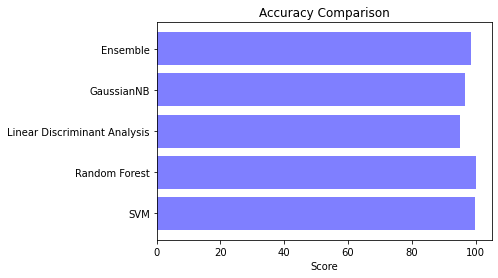

In [120]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Accuracy Comparison')
plt2.show()

# Pickle

In [121]:
X

ANNUAL  Jun-Sep    JUN    JUL    AUG    SEP    MAY  Mar-May    OCT  \
0     3373.2   1696.3  517.5  365.1  481.1  332.6  528.8    560.3  388.5   
1     3520.7   2185.9  537.1  228.9  753.7  666.2  446.1    458.3  197.2   
2     2957.4   1874.0  479.9  728.4  326.7  339.0  235.1    236.1  181.2   
3     3079.6   1977.6  495.1  502.0  160.1  820.4  304.5    506.9  222.2   
4     2566.7   1624.9  628.7  368.7  330.5  297.0  279.5    309.7  260.7   
...      ...      ...    ...    ...    ...    ...    ...      ...    ...   
4085  1533.7   1013.0  153.6  350.2  254.0  255.2  107.2    196.2  117.4   
4086  1405.5   1119.5  327.0  231.5  381.2  179.8   21.2     99.6  145.9   
4087  1426.3   1057.0  426.2  296.4  154.4  180.0   88.3    131.1   72.8   
4088  1395.0    958.5  244.1  116.1  466.1  132.2   57.4     76.7  169.2   
4089  1642.9    860.9  296.6  257.5  146.4  160.4  133.1    223.9  165.4   

      Oct-Dec  
0       980.3  
1       716.7  
2       690.6  
3       571.0  
4       630.8  
...       ...  
4085    316.6  
4086    167.1  
4087    177.6  
4088    290.5  
4089    555.4  

[4090 rows x 10 columns]

In [122]:
s = np.array([3369,1698.36,562,369,458.3,332.6,456.39,569.356,458.36,78.9])
print(s.shape)
s = s.reshape(1,-1)
print(s.shape)

(10,)
(1, 10)


In [123]:
pickle.dump(RT, open('model.pkl', 'wb'))

In [124]:
model = pickle.load(open('model.pkl', 'rb'))
print(model.predict(s))

[1]
